# Introduction to embeddings with the OpenAI API

In [5]:
import sys
import os

# Use current working directory and go one level up
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Now you can import your config
from config import api_key

from openai import OpenAI

## Chapter 1 - What are embeddings?

### Section 1.1 - The wonderful world of embeddings!

#### Creating embeddings
In this exercise, you'll create your very first embeddings using the OpenAI API. Normally, to interact with the OpenAI API, you would need an OpenAI API key, and creating embeddings would incur a cost. However, you do not need to create or provide an API key in this course.

The OPENAI_API_TOKEN placeholder has been provided in the code, which will send valid requests for the exercises in this course. If, at any point in the course, you hit a `RateLimitError`, pause for a moment and try again.

The `OpenAI` class from the `openai` library will be imported for you throughout the course, and after this exercise, the `client` will be created for you.

In [7]:
# Create an OpenAI client
client = OpenAI(api_key=api_key)

# Create a request to obtain embeddings
response = client.embeddings.create(
    model="text-embedding-3-small",
    input="this is a text to embed"
)

# Convert the response into a dictionary
response_dict = response.model_dump()
print(response_dict)

{'data': [{'embedding': [0.007293432019650936, 0.0234710443764925, -0.006453036330640316, -0.005503839813172817, -0.017693325877189636, -0.06573092937469482, 0.007976253516972065, -0.022570621222257614, -0.020934849977493286, -0.010985168628394604, 0.03964865580201149, -0.011743025854229927, -0.009409427642822266, -0.02915872074663639, 0.0473322719335556, 0.04412076249718666, -0.016657838597893715, -0.011908103711903095, 0.014414282515645027, 0.035626765340566635, 0.012380825355648994, 0.0035341628827154636, -0.0021685203537344933, 0.03238523751497269, -0.018263593316078186, -0.01099267229437828, -0.006122881080955267, 0.03349576145410538, 0.03994879871606827, -0.010730048641562462, -0.009949681349098682, -0.03856814652681351, 0.002943259896710515, -0.05105402320623398, -0.005338761955499649, -0.00026825122768059373, 0.04057909548282623, 0.04592160880565643, 0.028483401983976364, -0.009987199679017067, 0.024371467530727386, -0.021114936098456383, 0.006156647112220526, 0.038748234510421

#### Digging into the embeddings response

You've been able to successfully use the OpenAI Embeddings endpoint to embed text data, and in this exercise, you'll finish this off by extracting information from the API's response.

You've been provided with a response from the Embeddings API, which has already been converted into a dictionary and stored as `response_dict`. You'll need to extract the desired information from this dictionary. This `response_dict` has been printed for you, so you can view its contents and structure.

Recall that the response is structured like a nested Python dictionary, and it can be accessed in much the same way.

In [17]:
response_dict.keys()

dict_keys(['data', 'model', 'object', 'usage'])

In [16]:
response_dict['usage']['total_tokens']

6

In [24]:
response_dict['data'][0]['embedding'][:10]

[0.007293432019650936,
 0.0234710443764925,
 -0.006453036330640316,
 -0.005503839813172817,
 -0.017693325877189636,
 -0.06573092937469482,
 0.007976253516972065,
 -0.022570621222257614,
 -0.020934849977493286,
 -0.010985168628394604]

### Section 1.2 - Investigating the vector space

#### Embedding product descriptions

**remark** - this is a rather complex exercise. It can help to break it down in peaces to understand the details.

You've been provided with a list of dictionaries called `products`, which contains product information for different products sold by an online retailer. It's your job to embed the `'short_description'` for each product to enable semantic search for the retailer's website.

Here's a preview of the `products` list of dictionaries:
```
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ]
    },
    ...
]```

An OpenAI client has already been created as assigned to client.

In [25]:
products = [{'title': 'Smartphone X1',
  'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.',
  'price': 799.99,
  'category': 'Electronics',
  'features': ['6.5-inch AMOLED display',
   'Quad-camera system with 48MP main sensor',
   'Face recognition and fingerprint sensor',
   'Fast wireless charging']},
 {'title': 'Luxury Diamond Necklace',
  'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.',
  'price': 1499.99,
  'category': 'Beauty',
  'features': ['18k white gold chain',
   '0.5 carat diamond pendant',
   'Adjustable chain length',
   'Gift box included']},
 {'title': 'RC Racing Car',
  'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.',
  'price': 89.99,
  'category': 'Toys',
  'features': ['Top speed of 30 mph',
   'Responsive remote control',
   'Rechargeable battery',
   'Durable construction']},
 {'title': 'Ultra HD 4K TV',
  'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.',
  'price': 1299.99,
  'category': 'Electronics',
  'features': ['65-inch 4K UHD display',
   'Dolby Vision and HDR10+ support',
   'Smart TV with streaming apps',
   'Voice remote included']},
 {'title': 'Glowing Skin Serum',
  'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.',
  'price': 39.99,
  'category': 'Beauty',
  'features': ['Hyaluronic acid and vitamin C',
   'Hydrates and reduces fine lines',
   'Suitable for all skin types',
   'Cruelty-free']},
 {'title': 'LEGO Space Shuttle',
  'short_description': 'Build your own space adventure with this LEGO space shuttle set.',
  'price': 49.99,
  'category': 'Toys',
  'features': ['359 pieces for creative building',
   'Astronaut minifigure included',
   'Compatible with other LEGO sets',
   'For ages 7+']},
 {'title': 'Wireless Noise-Canceling Headphones',
  'short_description': 'Enjoy immersive audio and block out distractions with these headphones.',
  'price': 199.99,
  'category': 'Electronics',
  'features': ['Active noise cancellation',
   'Bluetooth 5.0 connectivity',
   'Long-lasting battery life',
   'Foldable design for portability']},
 {'title': 'Luxury Perfume Gift Set',
  'short_description': 'Indulge in a collection of premium fragrances with this gift set.',
  'price': 129.99,
  'category': 'Beauty',
  'features': ['Five unique scents',
   'Elegant packaging',
   'Perfect gift for fragrance enthusiasts',
   'Variety of fragrance notes']},
 {'title': 'Remote-Controlled Drone',
  'short_description': 'Take to the skies and capture stunning aerial footage with this drone.',
  'price': 299.99,
  'category': 'Electronics',
  'features': ['4K camera with gimbal stabilization',
   'GPS-assisted flight',
   'Remote control with smartphone app',
   'Return-to-home function']},
 {'title': 'Luxurious Spa Gift Basket',
  'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.',
  'price': 79.99,
  'category': 'Beauty',
  'features': ['Bath bombs, body lotion, and more',
   'Aromatherapy candles',
   'Reusable wicker basket',
   'Great for self-care']},
 {'title': 'Robot Building Kit',
  'short_description': 'Learn robotics and coding with this educational robot building kit.',
  'price': 59.99,
  'category': 'Toys',
  'features': ['Build and program your own robot',
   'STEM learning tool',
   'Compatible with Scratch and Python',
   'Ideal for young inventors']},
 {'title': 'High-Performance Gaming Laptop',
  'short_description': 'Dominate the gaming world with this powerful gaming laptop.',
  'price': 1499.99,
  'category': 'Electronics',
  'features': ['Intel Core i7 processor',
   'NVIDIA RTX graphics',
   '144Hz refresh rate display',
   'RGB backlit keyboard']},
 {'title': 'Natural Mineral Makeup Set',
  'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.',
  'price': 34.99,
  'category': 'Beauty',
  'features': ['Mineral foundation and eyeshadows',
   'Non-comedogenic and paraben-free',
   'Cruelty-free and vegan',
   'Includes makeup brushes']},
 {'title': 'Interactive Robot Pet',
  'short_description': 'Adopt your own robot pet that responds to your voice and touch.',
  'price': 79.99,
  'category': 'Toys',
  'features': ['Realistic pet behaviors',
   'Voice recognition and touch sensors',
   'Teaches responsibility and empathy',
   'Rechargeable battery']},
 {'title': 'Smart Thermostat',
  'short_description': "Control your home's temperature and save energy with this smart thermostat.",
  'price': 129.99,
  'category': 'Electronics',
  'features': ['Wi-Fi connectivity',
   'Energy-saving features',
   'Compatible with voice assistants',
   'Easy installation']},
 {'title': 'Designer Makeup Brush Set',
  'short_description': 'Upgrade your makeup routine with this premium designer brush set.',
  'price': 59.99,
  'category': 'Beauty',
  'features': ['High-quality synthetic bristles',
   'Chic designer brush handles',
   'Complete set for all makeup needs',
   'Includes stylish carrying case']},
 {'title': 'Remote-Controlled Dinosaur Toy',
  'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
  'price': 49.99,
  'category': 'Toys',
  'features': ['Realistic dinosaur sound effects',
   'Walks and roars like a real dinosaur',
   'Remote control included',
   'Educational and entertaining']},
 {'title': 'Wireless Charging Dock',
  'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.',
  'price': 39.99,
  'category': 'Electronics',
  'features': ['Qi wireless charging technology',
   'Supports multiple devices',
   'LED charging indicators',
   'Compact and stylish design']},
 {'title': 'Luxury Skincare Set',
  'short_description': 'Elevate your skincare routine with this luxurious skincare set.',
  'price': 179.99,
  'category': 'Beauty',
  'features': ['Premium anti-aging ingredients',
   'Hydrating and rejuvenating formulas',
   'Complete skincare regimen',
   'Elegant packaging']}]

In [80]:
# Extract a list of product short descriptions from products
product_descriptions = [product['short_description'] for product in products]

# Create embeddings for each product description
response = client.embeddings.create(
    model="text-embedding-3-small",
    input=product_descriptions)

response_dict = response.model_dump()

# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embedding'] = response_dict['data'][i]['embedding']   
     
# print(products[0].items())

#### Visualizing the embedded descriptions

Now that you've created embeddings from the product descriptions, it's time to explore them! You'll use t-SNE to reduce the number of dimensions in the embeddings data from 1,536 to two, which will make the data much easier to visualize.

You'll start with the products list of dictionaries you worked with in the last exercise, containing product information and the embeddings you created from the 'short_description'. As a reminder, here's a preview of products:
```
products = [
    {
        "title": "Smartphone X1",
        "short_description": "The latest flagship smartphone with AI-powered features and 5G connectivity.",
        "price": 799.99,
        "category": "Electronics",
        "features": [
            "6.5-inch AMOLED display",
            "Quad-camera system with 48MP main sensor",
            "Face recognition and fingerprint sensor",
            "Fast wireless charging"
        ],
        "embedding": [-0.014650369994342327, ..., 0.008677126839756966]
    },
    ...
]```

`matplotlib.pyplot` and `numpy` have been imported as `plt` and `np`, respectively.

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

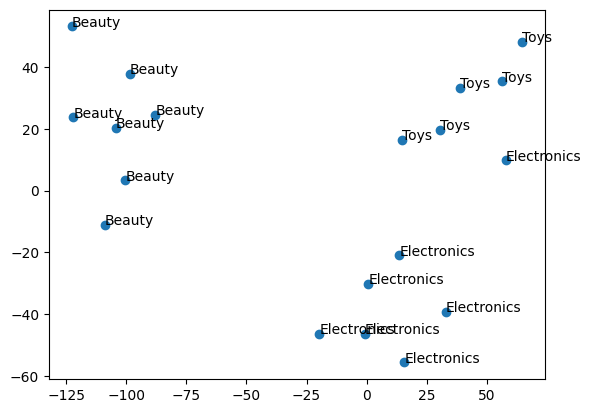

In [79]:
# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1])

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

### Section 1.3 - Text similarity

#### Computing cosine distances
To identify the most semantically similar texts, you need to apply a distance metric. A popular choice is the cosine distance.

In this exercise, you've been provided with four vectors: `A`, `B`, `C`, and `D`. It's your task to find out which vector is most similar to `A` using cosine distance.

Which vector is the most similar to `A`?

`distance` has already been imported from scipy.spatial.

In [82]:
from scipy.spatial import distance

In [84]:
A = [3, 1, 4]
B = [1, 5, 9]
C = [2, 6, 5]
D = [3, 5, 9]

In [89]:
print(distance.cosine(A,B))
print(distance.cosine(A,C))
print(distance.cosine(A,D))

0.16579245471375115
0.22159319134316813
0.08560380505068121


#### More repeatable embeddings

As you continue to work with embeddings, you'll find yourself making repeated calls to OpenAI's embedding model. To make these calls in a more repeatable and modular way, it would be better to define a custom function called `create_embeddings()` that would output embeddings for any number of text inputs. In this exercise, you'll do just that!

In [103]:
short_description = 'The latest flagship smartphone with AI-powered features and 5G connectivity.'
list_of_descriptions = ['Charge your devices conveniently with this sleek wireless charging dock.',
 'Elevate your skincare routine with this luxurious skincare set.']


In [104]:
# Define a create_embeddings function
def create_embeddings(texts):
  response = client.embeddings.create(
    model="text-embedding-3-small",
    input=texts
  )
  response_dict = response.model_dump()

  return [data['embedding'] for data in response_dict['data']]

# Embed short_description and print
print(create_embeddings(short_description)[0])

# Embed list_of_descriptions and print
print(create_embeddings(list_of_descriptions))

[0.016915064305067062, -0.012777181342244148, -0.022817159071564674, 0.021812092512845993, 0.013782248832285404, -0.0016519452910870314, 0.013696711510419846, 0.03697363659739494, 0.032119374722242355, -0.012531260959804058, -0.04060898348689079, -0.03323136642575264, -0.06594950705766678, -0.06385383009910583, -0.03132815286517143, -0.04755891487002373, -0.0754014104604721, 0.002628945279866457, 0.0640249103307724, -0.011184043250977993, -0.025832360610365868, 0.003504369407892227, 0.029874013736844063, -0.014017477631568909, -0.0009743269183672965, -0.02933940291404724, -0.06385383009910583, 0.020069263875484467, 0.017471058294177055, 0.018497509881854057, 0.01512946654111147, -0.041164979338645935, 0.03733716905117035, -0.010804470628499985, -0.020454183220863342, 0.001112657249905169, 0.01148342527449131, -0.040651753544807434, -0.033872898668050766, 0.03470689058303833, 0.011547578498721123, 0.04223420098423958, 0.014637624844908714, 0.021683786064386368, -0.024057455360889435, 0.

#### Finding the most similar product
Being able to compute similarity between embeddings is a key step within embeddings applications. In this exercise, you'll return to the products list of dictionaries that you worked with previously, which contains the embedded short descriptions you also created earlier.

You'll compare a piece of text to these embedded descriptions to identify the most similar description.

`numpy` has been imported as `np`, and `distance` is available from `scipy.spatial`. A `create_embeddings()` function has already been defined for you and is available to use for creating embeddings from a single input.

In [105]:
from scipy.spatial import distance
import numpy as np

In [108]:
# Embed the search text
search_text = "soap"
search_embedding = create_embeddings(search_text)[0]

distances = []
for product in products:
  # Compute the cosine distance for each product description
  dist = distance.cosine(search_embedding, product['embedding'])
  distances.append(dist)

# Find and print the most similar product short_description    
min_dist_ind = np.argmin(distances)
print(products[min_dist_ind]['short_description'])

Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.


## Chapter 2 - Embedding for AI Applications

### Section 2.1 - Semantic search and enriched embeddings

#### Enriching embeddings\

Previously, when you embedded product information, you were limited to only embedding the product 'short_description', which captured some, but not all of the relevant product information available. In this exercise, you'll embed `'title'`, `'short_description'`, `'category'`, and `'features'` to capture much more information.

Here's a reminder of the products list of dictionaries:

When combining the features into a single string, it should have the following structure:

In [121]:
# Define a function to combine the relevant features into a single string
def create_product_text(product):
  return f"""Title: {product['title']}
Description: {product['short_description']}
Category: {product['category']},
Features: {", ".join(product['features'])}
"""

# Combine the features for each product
product_texts = [create_product_text(product) for product in products]

# Create the embeddings from product_texts
product_embeddings = create_embeddings(product_texts)

#### Sorting by similarity

Now that you've embedded all of your features, the next step is to compute the similarities. In this exercise, you'll define a function called `find_n_closest()`, which computes the cosine distances between a query vector and a list of embeddings and returns the `n` smallest distances and their indexes.

In the next exercise, you'll use this function to enable your semantic product search application.

`distance` has been imported from `scipy.spatial`.

In [126]:
import numpy as np
from scipy.spatial import distance

In [152]:
def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    # Calculate the cosine distance between the query vector and embedding
    dist = distance.cosine(query_vector, embedding)
    # Append the distance and index to distances
    distances.append({"distance": dist, "index": index})
  # Sort distances by the distance key
  distances_sorted = sorted(distances, key=lambda x: x['distance'])
  # Return the first n elements in distances_sorted
  return distances_sorted[0:n]

#### Semantic search for products

Time to put your `find_n_closest()` function to use! You'll test out your semantic product search on a test query, computing a sorted list of the five most semantically similar products, based on the enriched data you gave the model.

Here's a reminder of the `find_n_closest()` function you created in the previous exercise:

The `create_embeddings()` function you created earlier is also available. Recall that it takes some text, and returns a list of lists containing the embeddings for each text. The `products` dictionary and the `product_embeddings` you created previously have also been loaded.

In [153]:
# Create the query vector from query_text
query_text = "computer"
query_vector = create_embeddings(query_text)[0]

# Find the five closest distances
hits = find_n_closest(query_vector, product_embeddings, n=5)

print(f'Search results for "{query_text}"')
for hit in hits:
  # Extract the product at each index in hits
  product = products[hit['index']]

  print(product["title"])

Search results for "computer"
High-Performance Gaming Laptop
Robot Building Kit
Smartphone X1
Smart Thermostat
Interactive Robot Pet


### Section 2.2 - Recommendation system

#### Product recommendation system

In this exercise, you'll make a recommendation system for an online retailer that sells a variety of products. This system recommends three similar products to users who visit a product page but don't purchase, based on the last product they visited.

You've been provided with a list of dictionaries of products available on the site,

and a dictionary for the last product the user visited, stored in `last_product`.

The following custom functions defined earlier in the course are also available for you to use:

- `create_embeddings(texts)` → returns a list of embeddings for each text in `texts`.
- `create_product_text(product)` → combines the `product` features into a single string for embedding.
- `find_n_closest(query_vector, embeddings, n=3) `→ returns the `n` closest distances and their indexes between the `query_vector` and `embeddings`, based on cosine distances.

In [154]:
last_product = {'title': 'Building Blocks Deluxe Set',
 'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.',
 'price': 34.99,
 'category': 'Toys',
 'features': ['Includes 500+ colorful building blocks',
  'Promotes STEM learning and creativity',
  'Compatible with other major brick brands',
  'Comes with a durable storage container',
  'Ideal for children ages 3 and up']}

In [172]:
# Combine the features for last_product and each product in products
last_product_text = create_product_text(last_product)
product_texts = [create_product_text(product) for product in products]

# Embed last_product_text and product_texts
last_product_embeddings = create_embeddings(last_product_text)[0]
product_embeddings = create_embeddings(product_texts)

# Find the three smallest cosine distances and their indexes
hits = find_n_closest(last_product_embeddings, product_embeddings, n=3)

for hit in hits:
  product = products[hit['index']]
  print(product['title'])

Robot Building Kit
LEGO Space Shuttle
Designer Makeup Brush Set


#### Adding user history to the recommendation engine
For many recommendation cases, such as film or purchase recommendation, basing the next recommendation on one data point will be insufficient. In these cases, you'll need to embed all or some of the user's history for more accurate and relevant recommendations.

In this exercise, you'll extend your product recommendation system to consider all of the products the user has previously visited, which are stored in a list of dictionaries called `user_history`.

The following custom functions are available for you to use: `create_embeddings(texts)`, `create_product_text(product)`, and `find_n_closest(query_vector, embeddings, n=3)`. numpy has also been imported as `np`.

In [210]:
user_history = [
 {'title': 'Remote-Controlled Dinosaur Toy',
  'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
  'price': 49.99,
  'category': 'Toys',
  'features': ['Realistic dinosaur sound effects',
   'Walks and roars like a real dinosaur',
   'Remote control included',
   'Educational and entertaining']},
 {'title': 'Building Blocks Deluxe Set',
  'short_description': 'Unleash your creativity with this deluxe set of building blocks for endless fun.',
  'price': 34.99,
  'category': 'Toys',
  'features': ['Includes 500+ colorful building blocks',
   'Promotes STEM learning and creativity',
   'Compatible with other major brick brands',
   'Comes with a durable storage container',
   'Ideal for children ages 3 and up']}]

In [209]:
# Prepare and embed the user_history, and calculate the mean embeddings
history_texts = [create_product_text(article) for article in user_history]
history_embeddings = create_embeddings(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

# Filter products to remove any in user_history
products_filtered = [product for product in products if product not in user_history]

# Combine product features and embed the resulting texts
product_texts = [create_product_text(product) for product in products]
product_embeddings = create_embeddings(product_texts)

hits = find_n_closest(mean_history_embeddings, product_embeddings)

for hit in hits:
  product = products_filtered[hit['index']]
  print(product['title'])

Remote-Controlled Dinosaur Toy
Robot Building Kit
Interactive Robot Pet


### Section 2.3. - Embeddings for classification task

#### Embedding restaurant reviews

One common classification task that embeddings are great for is sentiment analysis. In this and the following exercises, you'll navigate through the workflow of performing sentiment analysis using embeddings.

You've been provided with a small sample of restaurant reviews, stored in `reviews`, and sentiment labels stored in `sentiments`:

In [211]:
sentiments = [{'label': 'Positive'},
              {'label': 'Neutral'},
              {'label': 'Negative'}]

reviews = ["The food was delicious!",
           "The service was a bit slow but the food was good",
           "The food was cold, really disappointing!"]

You'll use zero-shot classification to classify the sentiment of these reviews by embedding the reviews and class labels.

The `create_embeddings()` function you created previously is also available to use.

In [217]:
# Create a list of class descriptions from the sentiment labels
class_descriptions =  [sentiment['label'] for sentiment in sentiments]

# Embed the class_descriptions and reviews
class_embeddings = create_embeddings(class_descriptions)
review_embeddings = create_embeddings(reviews)

#### Classifying review sentiment
Now that you've calculated the embeddings, it's time to compute the cosine distances and extract the most similar label.

You'll do this by defining a function called `find_closest()`, which can be used to compare the embeddings between one vector and multiple others, and return the nearest distance and its index. You'll then loop over the reviews and and use `find_closest()` to find the closest distance for each review, extracting the classified label using the index.

The `class_embeddings` and `review_embeddings` objects you created in the last exercise are available for you to use, as well as the `reviews` and `sentiments`.

In [224]:
# Define a function to return the minimum distance and its index
def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  # Find the closest distance and its index using find_closest()
  closest = find_closest(review_embeddings[index], class_embeddings)
  # Subset sentiments using the index from closest
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')

"The food was delicious!" was classified as Positive
"The service was a bit slow but the food was good" was classified as Negative
"The food was cold, really disappointing!" was classified as Negative


#### Embedding more detailed descriptions

One of the last predicted labels didn't seem representative of the review; this was probably down to the lack of information being captured when we're only embedding the class labels. This time, descriptions of each class will be embedded instead, so the model better "understands" that you're classifying restaurant reviews.

The following objects are available for you to use:

In [227]:
sentiments = [{'label': 'Positive',
               'description': 'A positive restaurant review'},
              {'label': 'Neutral',
               'description':'A neutral restaurant review'},
              {'label': 'Negative',
               'description': 'A negative restaurant review'}]

reviews = ["The food was delicious!",
           "The service was a bit slow but the food was good",
           "The food was cold, really disappointing!"]

In [228]:
# Extract and embed the descriptions from sentiments
class_descriptions = [x['description'] for x in sentiments]
class_embeddings = create_embeddings(class_descriptions)
review_embeddings = create_embeddings(reviews)

def find_closest(query_vector, embeddings):
  distances = []
  for index, embedding in enumerate(embeddings):
    dist = distance.cosine(query_vector, embedding)
    distances.append({"distance": dist, "index": index})
  return min(distances, key=lambda x: x["distance"])

for index, review in enumerate(reviews):
  closest = find_closest(review_embeddings[index], class_embeddings)
  label = sentiments[closest['index']]['label']
  print(f'"{review}" was classified as {label}')

"The food was delicious!" was classified as Positive
"The service was a bit slow but the food was good" was classified as Neutral
"The food was cold, really disappointing!" was classified as Negative


## Chapter 3 - Vector databases